In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attractions_new.csv to attractions_new.csv


In [ ]:
df_attractions = pd.read_csv('attractions_new.csv' , sep=',', encoding='latin-1', usecols=['location_name','ratings','description','best time to visit','location_type','type_id','no. of ratings','user_id','state','Address','website_link','image_link'])
print(df_attractions.shape)
df_attractions.head()

(100, 12)


,location_name,ratings,description,best time to visit,location_type,type_id,no. of ratings,user_id,state,Address,website_link,image_link
0,Leh Ladakh,4.6,Ladakh is a union territory in the Kashmir reg...,Jun to Sep,Hill Station,1,139,1,Jammu and Kashmir,"leh ladhak,jammu and kashmir,194101,india",lehladakhindia.com,https://www.holidify.com/images/bgImages/LADAK...
1,Srinagar,4.5,"Famously known as 'Heaven on Earth, Srinagar i...",April to October,City,2,126,3,Jammu and Kashmir,"srinagar,jammu and kashmir,190001,india",srinagar.nic.in,https://www.holidify.com/images/bgImages/SRIN...
2,Manali,4.5,"With spectacular valleys, breathtaking views, ...",October to June,Hill Station,1,466,3,Himachal Pradesh,"manali,himachal pradesh,175131,india",himachaltourism.gov.in,https://www.holidify.com/images/bgImages/MANA...
3,Coorg,4.2,Located amidst imposing mountains in Karnataka...,October to March,Hill Station,1,432,5,Karnataka,"coorg,karnataka,571201,india",coorgtourism.co.in,https://www.holidify.com/images/bgImages/COOR...
4,Andaman,4.5,Replete with turquoise blue water beaches and ...,October to Jun,Island,3,135,2,Andaman and Nicobar Islands,"andaman,andamana and nicobar,744209",andamans.gov.in,https://www.holidify.com/images/bgImages/ANDA...


In [ ]:
import re
def get_clean_text(data):
    cleaned=[]
    for book in data:
        single_lower= re.sub(r'\s+',' ',book).lower() # Multiple space removal and conevrt to lower case
        clean_text = re.sub('[^a-zA-Z]',' ', single_lower)
        cleaned.append(clean_text)
    return cleaned


In [ ]:
cleaned=get_clean_text(df_attractions['location_name'])
print(cleaned)

df_clean=pd.DataFrame({'Names':cleaned})
df_clean.head()

[' leh ladakh', ' srinagar', ' manali', ' coorg', ' andaman', ' udaipur', ' gangtok', ' munnar', ' goa', ' kodaikanal', ' ooty', ' alleppey', ' lonavala', ' lakshadweep', ' varanasi', ' jaipur', ' rishikesh', ' mcleodganj', ' darjeeling', ' nainital', ' varkala', ' shimla', ' mussoorie', ' dalhousie', ' amarnath', ' mount abu', ' wayanad', ' pachmarhi', ' mumbai', ' agra', ' kolkata', ' bangalore', ' jodhpur', ' amritsar', ' delhi', ' jaisalmer', ' ujjain', ' hyderabad', ' pondicherry', ' khajuraho', ' chennai', ' alibaug', ' vaishno devi', ' ajanta and ellora caves', ' haridwar', ' kanyakumari', ' pune', ' kochi', ' ahmedabad', ' kanha national park', ' mysore', ' chandigarh', ' hampi', ' gulmarg', ' almora', ' shirdi', ' auli', ' madurai', ' bodh gaya', ' mahabaleshwar', ' visakhapatnam', ' kasol', ' nashik', ' shimoga  shivamogga ', ' tirupati', ' jim corbett national park', ' gwalior', ' mathura', ' jog falls', ' rameshwaram', ' vrindavan', ' coimbatore', ' lucknow', ' dharamshala'

,Names
0,leh ladakh
1,srinagar
2,manali
3,coorg
4,andaman


In [ ]:
import nltk

def remove_stopwords(data):
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words("english")
    splited_text=data.str.split()
    text_no_stopwords=[]
    for i in range(len(splited_text)):
        text_no_stopwords1 = [word for word in splited_text[i] if word not in stop_words]
        text_no_stopwords.append(' '.join(text_no_stopwords1))
    return text_no_stopwords

In [ ]:
a=remove_stopwords(df_clean['Names'])
df_clean['no_stopwords']=a;
df_clean['User_id']=df_attractions['user_id']
df_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Names,no_stopwords,User_id
0,leh ladakh,leh ladakh,1
1,srinagar,srinagar,3
2,manali,manali,3
3,coorg,coorg,5
4,andaman,andaman,2


In [ ]:
from sklearn.model_selection import train_test_split
df_attractions_train, df_attractions_test, df_attractions_userId_train, df_attractions_userId_test = train_test_split(
df_clean['Names'],df_clean['User_id'], test_size=0.15, random_state=0)

In [ ]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 2; max_df = 0.2;
#; max_features = 300
# max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
df_attractions_train_tfidf = tfidf.fit_transform(df_attractions_train).toarray()
print(df_attractions_train_tfidf.shape)
df_attractions_test_tfidf = tfidf.transform(df_attractions_test).toarray()
print(df_attractions_test_tfidf.shape)

(85, 3)
(15, 3)


In [ ]:
# First, we can see what hyperparameters the model has:
from sklearn.metrics import  accuracy_score
from sklearn import svm
SVM = svm.SVC()
print('Check the parameters of SVM:\n',SVM.get_params())

Check the parameters of SVM:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Check the accuracy of the SVM base model:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
SVM_base_model = svm.SVC()
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train)
SVM_base_model_accur=accuracy_score(df_attractions_userId_test, SVM_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of SVM_base_model:',SVM_base_model_accur)

The accuracy score of SVM_base_model: 0.06666666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
print('Check the parameters of KNN:\n',KNN.get_params())

Check the parameters of KNN:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
KNN_base_model = KNeighborsClassifier()
KNN_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train)
KNN_base_model_accur=accuracy_score(df_attractions_userId_test, KNN_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of KNN_base_model:',KNN_base_model_accur)

The accuracy score of KNN_base_model: 0.06666666666666667


In [ ]:
# DT base model:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

DT_base_model= DecisionTreeClassifier() # Create Decision Tree classifer object
DT_base_model=DT_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train) # Train Decision Tree Classifer
#Predict the response for test dataset
DT_base_model_pred = DT_base_model.predict(df_attractions_test_tfidf)
DT_base_model_accur=accuracy_score(df_attractions_userId_test, DT_base_model.predict(df_attractions_test_tfidf))
print("Accuracy:",metrics.accuracy_score(df_attractions_userId_test, DT_base_model_pred))


Accuracy: 0.06666666666666667


In [ ]:
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_userId_train) # fit the SVM model to the training data
predictions = SVM_base_model.predict(df_attractions_test_tfidf)
index_df_attractions_test = df_attractions_test.index
df_test = df_clean.loc[index_df_attractions_test]
# Add the predictions
df_test['Predicted_user_id'] = predictions
df_test = df_test[['Names', 'User_id', 'Predicted_user_id']]
#df_test.drop(columns='labels_encoder',inplace=True)
df_test

,Names,User_id,Predicted_user_id
26,wayanad,5,1
86,jammu,3,1
2,manali,3,1
55,shirdi,2,1
75,kovalam,4,1
93,chittorgarh,5,1
16,rishikesh,4,1
73,dharamshala,2,1
54,almora,2,1
95,lavasa,3,1


In [ ]:
print("\nClassification report of KNN model:\n", classification_report(df_attractions_userId_test,predictions))



Classification report of KNN model:
               precision    recall  f1-score   support

           1       0.07      1.00      0.12         1
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.07        15
   macro avg       0.01      0.20      0.03        15
weighted avg       0.00      0.07      0.01        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion Matrix of SVM model:



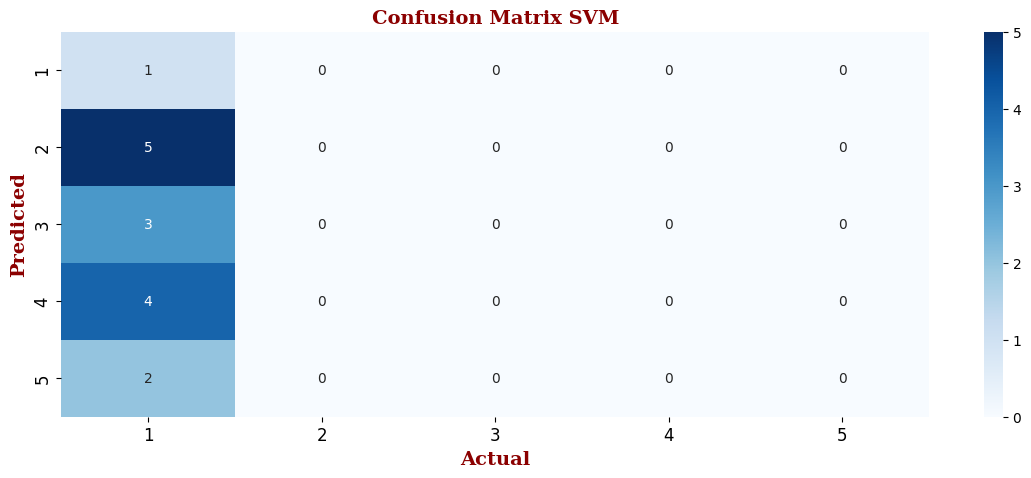

In [ ]:
SVM_df = df_test[['User_id']].drop_duplicates().sort_values('User_id')
font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
SVM_conf_matrix = confusion_matrix(df_attractions_userId_test,predictions)
plt.figure(figsize=(14,5))
sns.heatmap(SVM_conf_matrix,
            annot=True,
            xticklabels=SVM_df['User_id'].values,
            yticklabels=SVM_df['User_id'].values,
            cmap="Blues")
plt.ylabel('Predicted',fontdict=font)
plt.xlabel('Actual',fontdict=font)
plt.title('Confusion Matrix SVM',fontdict=font)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
print("\nConfusion Matrix of SVM model:\n")
plt.show()

In [ ]:

import plotly.express as px

df = px.data.tips()
fig = px.bar(df_test, x="Names", y="User_id", color='Predicted_user_id')
fig.show()

In [ ]:

df_clean_type=pd.DataFrame({'Names':df_clean['Names']})
df_clean_type['Location_type']=df_attractions['location_type']
df_clean_type['Actual_type_id']=df_attractions['type_id']
df_clean_type.head()

,Names,Location_type,Actual_type_id
0,leh ladakh,Hill Station,1
1,srinagar,City,2
2,manali,Hill Station,1
3,coorg,Hill Station,1
4,andaman,Island,3


In [ ]:
from sklearn.model_selection import train_test_split
df_attractions_train2, df_attractions_test2, df_attractions_typeId_train, df_attractions_typeId_test = train_test_split(
df_clean_type['Names'],df_clean_type['Actual_type_id'], test_size=0.15, random_state=0)

In [ ]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 2; max_df = 1.
#; max_features = 300
# max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
df_attractions_train_tfidf = tfidf.fit_transform(df_attractions_train2).toarray()
print(df_attractions_train_tfidf.shape)
df_attractions_test_tfidf = tfidf.transform(df_attractions_test2).toarray()
print(df_attractions_test_tfidf.shape)

(85, 3)
(15, 3)


In [ ]:
from sklearn import svm
SVM = svm.SVC()
print('Check the parameters of SVM:\n',SVM.get_params())

Check the parameters of SVM:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# Check the accuracy of the SVM base model:
from sklearn import svm
SVM_base_model = svm.SVC()
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train)
SVM_base_model_accur=accuracy_score(df_attractions_typeId_test, SVM_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of SVM_base_model:',SVM_base_model_accur)

The accuracy score of SVM_base_model: 0.2


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
print('Check the parameters of KNN:\n',KNN.get_params())

Check the parameters of KNN:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
KNN_base_model = KNeighborsClassifier()
KNN_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train)
KNN_base_model_accur=accuracy_score(df_attractions_typeId_test, KNN_base_model.predict(df_attractions_test_tfidf))
print('The accuracy score of KNN_base_model:',KNN_base_model_accur)

The accuracy score of KNN_base_model: 0.2


In [ ]:
# DT base model:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

DT_base_model= DecisionTreeClassifier() # Create Decision Tree classifer object
DT_base_model=DT_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train) # Train Decision Tree Classifer
#Predict the response for test dataset
DT_base_model_pred = DT_base_model.predict(df_attractions_test_tfidf)
DT_base_model_accur=accuracy_score(df_attractions_typeId_test, DT_base_model.predict(df_attractions_test_tfidf))
print("Accuracy:",metrics.accuracy_score(df_attractions_typeId_test, DT_base_model_pred))


Accuracy: 0.2


In [ ]:
SVM_base_model.fit(df_attractions_train_tfidf, df_attractions_typeId_train) # fit the SVM model to the training data
predictions = SVM_base_model.predict(df_attractions_test_tfidf)
index_df_attractions_test = df_attractions_test2.index
df_test_results = df_clean_type.loc[index_df_attractions_test]
# Add the predictions
df_test_results['Predicted_type_id'] = predictions
df_test_results = df_test_results[['Names', 'Location_type','Actual_type_id', 'Predicted_type_id']]
df_test_results

,Names,Location_type,Actual_type_id,Predicted_type_id
26,wayanad,Hill Station,1,2
86,jammu,City,2,2
2,manali,Hill Station,1,2
55,shirdi,Pilgrimage,6,2
75,kovalam,Beach,4,2
93,chittorgarh,Historical/Cultural,7,2
16,rishikesh,City,2,2
73,dharamshala,Hill Station,1,2
54,almora,Hill Station,1,2
95,lavasa,Hill Station,1,2


In [ ]:
print("\nClassification report of SVM model:\n", classification_report(df_attractions_typeId_test,predictions))



Classification report of SVM model:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.20      1.00      0.33         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.20        15
   macro avg       0.03      0.17      0.06        15
weighted avg       0.04      0.20      0.07        15



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Confusion Matrix of SVM model:



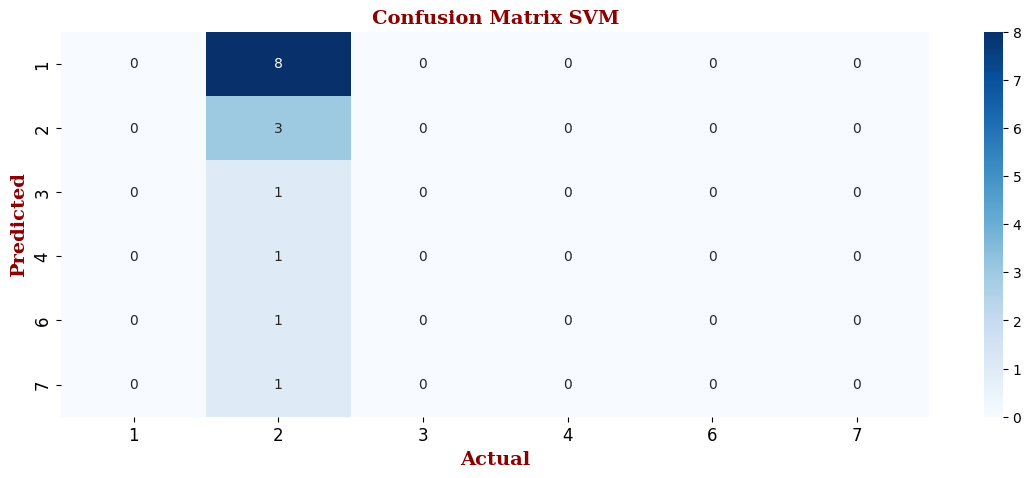

In [ ]:
SVM_df = df_test_results[['Actual_type_id']].drop_duplicates().sort_values('Actual_type_id')
font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
SVM_conf_matrix = confusion_matrix(df_attractions_typeId_test,predictions)
plt.figure(figsize=(14,5))
sns.heatmap(SVM_conf_matrix,
            annot=True,
            xticklabels=SVM_df['Actual_type_id'].values,
            yticklabels=SVM_df['Actual_type_id'].values,
            cmap="Blues")
plt.ylabel('Predicted',fontdict=font)
plt.xlabel('Actual',fontdict=font)
plt.title('Confusion Matrix SVM',fontdict=font)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
print("\nConfusion Matrix of SVM model:\n")
plt.show()

In [ ]:
import plotly.express as px

df = px.data.tips()
fig = px.bar(df_test_results, x="Names", y="Actual_type_id", color='Predicted_type_id')
fig.show()